In [1]:
import numpy as np
import pandas as pd
import os
import pdb
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(97)

In [2]:
final_sequences = pd.read_parquet("final_sequences_v6.parquet")

In [3]:
final_sequences

,designed_for,sequence,design_model,target_cell_exp_weight,diversity_loss_coef,entropy_loss_coef,THP1,Jurkat,K562
0,THP1,CGACGCCAACCGAGGAAACGGAAGCAGAAGCAGAAGCAGAAGCGAA...,coms_0.03_total_rounds_3_gd_steps_10_mutation_...,1.5,1.0,1.0,1.629622,0.379506,0.336685
1,THP1,CGACGCCAACCGAGGAAGCGGAAGCAGAAGCAGAAGCAGAAGCAGA...,coms_0.03_total_rounds_3_gd_steps_10_mutation_...,1.5,1.0,1.0,1.687961,0.559623,0.479022
2,THP1,CGACGCCAACCGAGGAAACCGAAGCGGAAGCAGAAGCTGAAGCAGA...,coms_0.03_total_rounds_3_gd_steps_10_mutation_...,1.5,1.0,1.0,1.599566,0.389701,0.326611
3,THP1,CGACGCCAACCGAGGAAACGGAAGCAGAAGCAGAAGCAGAAGCAGA...,coms_0.03_total_rounds_3_gd_steps_10_mutation_...,1.5,1.0,1.0,1.664889,0.414526,0.354171
4,THP1,CGACGCCAACCGAGGAAACAGAAGGAAACGGAAGCAGAAGCAGAAG...,coms_0.03_total_rounds_3_gd_steps_10_mutation_...,1.5,1.0,1.0,1.853674,0.618269,0.605900
...,...,...,...,...,...,...,...,...,...
4679995,K562,GGGGGGCGTGTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT...,coms_0.3_total_rounds_5_gd_steps_5_mutation_st...,2.0,10.0,10.0,0.676364,0.917514,1.550400
4679996,K562,GCCCCTTTTCTTTTGGGGGGGGGGGGGGGGGGGGGGGGGCCCCTTT...,coms_0.3_total_rounds_5_gd_steps_5_mutation_st...,2.0,10.0,10.0,0.615660,0.885715,1.572785
4679997,K562,TTTTTTGGGGGGGGGGGGGGGGCGGGACCCCCTTTTTTTTTTTTTT...,coms_0.3_total_rounds_5_gd_steps_5_mutation_st...,2.0,10.0,10.0,0.583300,0.760906,1.487105
4679998,K562,GCGCCTTCTTTTTCGGGGGGGGGGGGGGGGCGGGGGGGCGGGGCGC...,coms_0.3_total_rounds_5_gd_steps_5_mutation_st...,2.0,10.0,10.0,0.738684,1.216584,1.762630


In [26]:
oracle_predictions_dir = "./oracle_predictions/"
all_oracle_models = os.listdir(oracle_predictions_dir)

all_oracle_predictions = {}
all_oracle_predictions["design_model"] = []
for i, cell in enumerate(["THP1", "Jurkat", "K562"]):
    all_oracle_predictions[cell] = []
    
for model in all_oracle_models:
    preds = np.load(os.path.join(oracle_predictions_dir, model, "oracle_test_predictions.npy"), allow_pickle=True)[()]
    
    all_oracle_predictions["design_model"].extend([model]*len(preds["THP1"]))
    for i, cell in enumerate(["THP1", "Jurkat", "K562"]):
        all_oracle_predictions[cell].extend(list(preds[cell]))

In [27]:
all_oracle_predictions = pd.DataFrame(all_oracle_predictions)

THP1


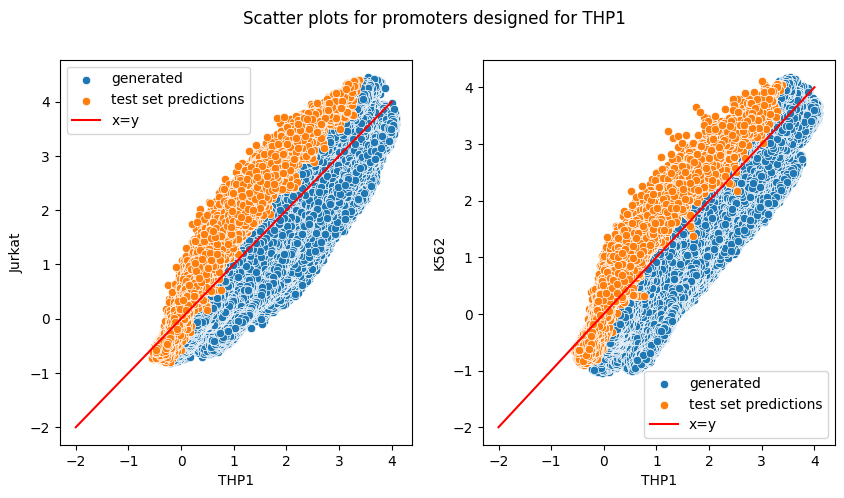

Jurkat


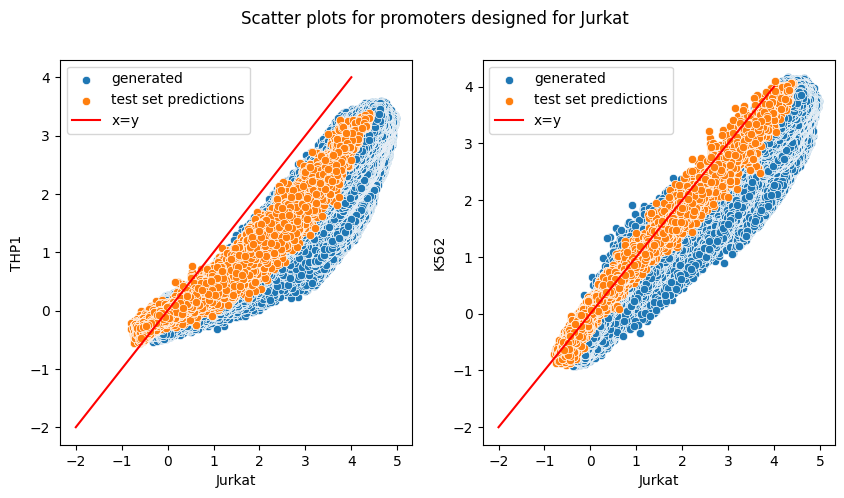

K562


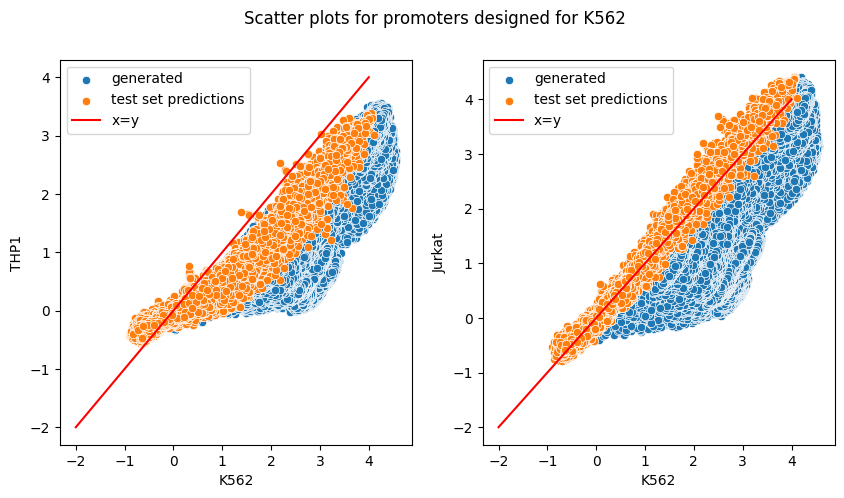

In [29]:
for cell in ["THP1", "Jurkat", "K562"]:
    print(cell)
    other_cells = [c for c in ["THP1", "Jurkat", "K562"] if c != cell]
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    
    for j, other_cell in enumerate(other_cells):
        sns.scatterplot(data=final_sequences[final_sequences["designed_for"] == cell].reset_index(drop=True), \
                        x=cell,
                        y=other_cell, \
                        ax=ax[j], label="generated")
        sns.scatterplot(data=all_oracle_predictions, \
                        x=cell,
                        y=other_cell, \
                        ax=ax[j], label="test set predictions")
        ax[j].plot(np.linspace(-2, 4, 10), np.linspace(-2, 4, 10), color="r", label="x=y")
        ax[j].legend()
    fig.suptitle(f"Scatter plots for promoters designed for {cell}")
    plt.show()